Variables to determine car speed

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

# Importing Engine Data
#cbf650r_engine_data_file_path = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/Repo/engine_data.xlsx"
#cbf650r_engine_data = pd.read_excel(cbf650r_engine_data_file_path)

# total weight of car (minus driver) (lbm)
w_car = 569
# weight of driver (lbm)
w_driver = 130
# weight bias, if less than 0.5, then the rear of the car will have more weight, if more than 0.5, then the front will have more weight
w_bias = 0.507
# length of wheelbase (in)
l = 60
# vertical center of gravity (in)
h = 15
# setting pi as a number
#pi = 3.14159

In [5]:
plt.plot(cbf650r_engine_data['V1'],cbf650r_engine_data['F1'])
plt.plot(cbf650r_engine_data['V2'],cbf650r_engine_data['F2'])
plt.plot(cbf650r_engine_data['V3'],cbf650r_engine_data['F3'])
plt.plot(cbf650r_engine_data['V4'],cbf650r_engine_data['F4'])
plt.plot(cbf650r_engine_data['V5'],cbf650r_engine_data['F5'])
plt.plot(cbf650r_engine_data['V6'],cbf650r_engine_data['F6'])

NameError: name 'cbf650r_engine_data' is not defined

Simple point-mass simulator: Straight Line

- This code simply shows how quickly a simple point mass vehicle can speed up and slow down a simple straight track when a constant accerleration is applied
- Assumed that the tires are the limiting factor, engine and gearing aren't considered
- boundary conditions require that the initial and final velocity be 0 mph
- This is a super basic model and won't accureately model how fast the car is

total time to travel straight 1.87 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

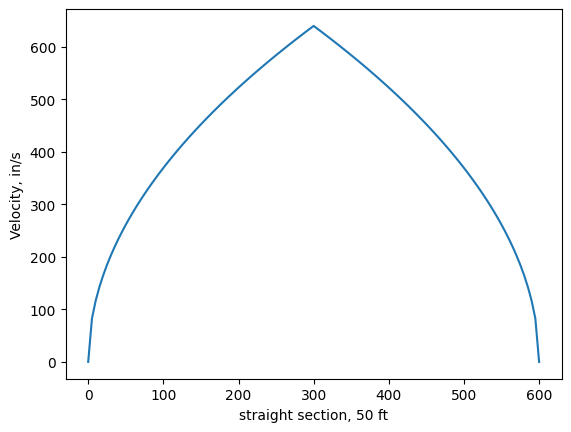

In [10]:
# Run one: How quickly can the car start and stop along a straight line?

# straight line of 50 feet
track = 50
# Convertes track to inches
track = track*12

# discretizing track
dx = 5
n = track/dx

# nodespace
nodes = np.linspace(0,track,int(n+1))

# Friction coefficient of approximately 2.2, will subsitute with more accurate friction ellipse
f_approx = 1.2

a_x = w_car*f_approx

# Determine the speed if the car accelerated for the entire length of the traffic, starting from 0 mph at node 0
v1 = np.zeros(int(n+1))
for i in np.arange(n):
    v1[int(i+1)] = np.sqrt(v1[int(i)]**2 + 2*a_x*dx)

# Determine the speed if the car deaccelerated for the entire length of the traffic, ending at 0 mph at node n
v2 = np.zeros(int(n+1))
for i in np.arange(1,n+1):
    v2[int(-i-1)] = np.sqrt(v2[int(-i)]**2 + 2*a_x*dx)

# Determine which value of the two above lists is lowest. This list is the theoretical velocity at each node to satisfy the stated assumptions
v3 = np.zeros(int(n+1))
for i in np.arange(int(n)):
    if v1[i] < v2 [i]:
        v3[i] = (v1[int(i)])
    else:
        v3[i] = (v2[int(i)])

# Determining the total time it takes to travel the track by rewriting the equation v1 = v0 + a*t
t = 0
for i in np.arange(len(v3)-1):
    t += np.abs(v3[i+1]-v3[i])/a_x

print(f"total time to travel straight {round(t,2)} seconds")

plt.plot(nodes,v3)
plt.xlabel('straight section, 50 ft')
plt.ylabel('Velocity, in/s')
plt.show

Simple point-mass simulator: Oval Track

- This code simply shows how quickly a simple point mass vehicle can speed up and slow down a simple oval track, where one corner has a radius of 25 ft, and the other corner has a radius of 35 ft. The straights connecting the two sections are both 50 ft.
- Assumed that the tires are the limiting factor, engine and gearing aren't considered
- Constant friction circle of 2.2 G's
- boundary conditions require that the initial velocity be 0 mph
- This is a super basic model and won't accureately model how fast the car is!

total time to travel straight 1.71 seconds
total track distance = 288.5 ft


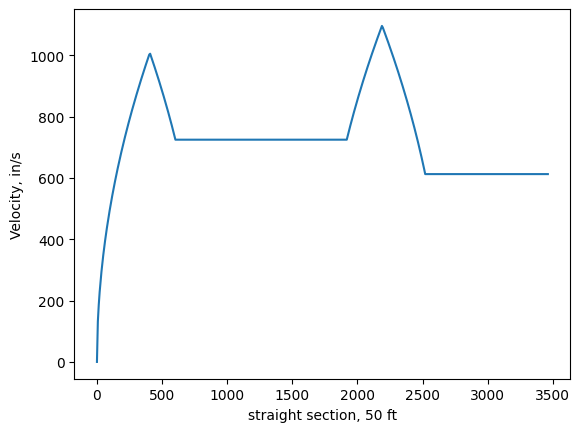

In [11]:
import numpy as np
from matplotlib import pyplot as plt
pi = np.pi
# Run one: How quickly can the car start and stop along a straight line?

# Track components

# straight's,  line of 50 feet
t = np.array([50*12, pi*35*12, 50*12, pi*25*12])
track = np.sum(t)

# discretizing track
n = 500
dx = track/n

# nodespace
nodes = np.linspace(0,track,int(n+1))

# Friction coefficient of approximately 2.2, will subsitute with more accurate friction ellipse
f_approx = 2.2

# Maximum acceleration in any direction
a = w_car*f_approx

# Determining maximum lateral acceleration for the two corners

# 35 ft corner
v_c1 = np.sqrt(a*35*12)
# 25 ft corner
v_c2 = np.sqrt(a*25*12)

# Determine the speed if the car accelerated for the entire length of the traffic, starting from 0 mph at node 0
v1 = np.zeros(int(n+1))
v1[int(np.ceil(t[0]/dx)):int(np.ceil((t[0]+t[1])/dx))] = v_c1
v1[int(np.ceil((t[0]+t[1]+t[2])/dx)):] = v_c2
for i in np.arange(n):
    if (np.sqrt(v1[int(i)]**2 + 2*a*dx) < v1[int(i+1)]) or (v1[int(i+1)] == 0.):
        v1[int(i+1)] = np.sqrt(v1[int(i)]**2 + 2*a*dx)

# Determine the speed if the car deaccelerated for the entire length of the traffic, ending at 0 mph at node n
v2 = np.zeros(int(n+1))
v2[int(np.ceil(t[0]/dx)):int(np.ceil((t[0]+t[1])/dx))] = v_c1
v2[int(np.ceil((t[0]+t[1]+t[2])/dx)):] = v_c2
for i in np.arange(1,n+1):
    if (np.sqrt(v2[int(-i)]**2 + 2*a*dx) < v2[int(-i-1)]) or (v2[int(-i-1)] == 0.):
        v2[int(-i-1)] = np.sqrt(v2[int(-i)]**2 + 2*a*dx)

# Determine which value of the two above lists is lowest. This list is the theoretical velocity at each node to satisfy the stated assumptions
v3 = np.zeros(int(n+1))
for i in np.arange(int(n+1)):
    if v1[i] < v2 [i]:
        v3[i] = (v1[int(i)])
    else:
        v3[i] = (v2[int(i)])

# Determining the total time it takes to travel the track by rewriting the equation v1 = v0 + a*t
t = 0
for i in np.arange(len(v3)-1):
    t += np.abs(v3[i+1]-v3[i])/a
print(f"total time to travel straight {round(t,2)} seconds")

# Plotting result
plt.plot(nodes,v3)
plt.xlabel('straight section, 50 ft')
plt.ylabel('Velocity, in/s')
plt.show
print(f"total track distance = {round(track/12, 2)} ft")

Simple point-mass simulator: Oval Track with Curved Straights

- This code simply shows how quickly a simple point mass vehicle can speed up and slow down a simple oval track, where one corner has a radius of 25 ft, and the other corner has a radius of 35 ft. The straights connecting the two sections are both 50 ft.
- Assumed that the tires are the limiting factor, engine and gearing aren't considered
- Constant friction circle of 2.2 G's
- boundary conditions require that the initial velocity be 0 mph
- This is a super basic model and won't accureately model how fast the car is!

total time to travel straight 1.66 seconds
total track distance = 288.5 ft


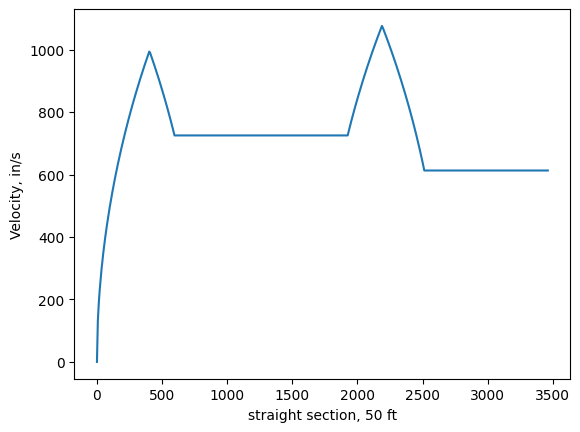

In [12]:
# Run one: How quickly can the car start and stop along a straight line?

# Track components

# Determining the shape of the track

# Each element in the t_rad list corresponds to the radius of that element (in)
t_rad = np.array([200*12, 35*12, 200*12, 25*12])
# Each element in the t_len list corresponds to the length of that element (rad)
t_len = np.array([(1/4), pi, (1/4), pi])
t_len_tot = np.multiply(t_rad,t_len)
track = np.sum(t_len_tot)

# discretizing track
n = 500
dx = track/n

# nodespace
nds = np.linspace(0,track,int(n+1))

# Friction coefficient of approximately 2.2, will subsitute with more accurate friction ellipse
f_apprx = 2.2

# Maximum acceleration in any direction
a = w_car*f_apprx

# Determining maximum lateral acceleration for every turn
t_vel = np.sqrt(a*t_rad)

# List showing radius at every node. Used to calculate maximum tangential acceleration
nd_rad = np.zeros(int(n+1))

nd_rad[0:int(np.ceil(t_len_tot[0]/dx))] = t_rad[0]
nd_rad[int(np.ceil(t_len_tot[0]/dx)):int(np.ceil(np.sum(t_len_tot[0:2])/dx))] = t_rad[1]
nd_rad[int(np.ceil(np.sum(t_len_tot[0:2])/dx)):int(np.ceil(np.sum(t_len_tot[0:3])/dx))] = t_rad[2]
nd_rad[int(np.ceil((np.sum(t_len_tot[0:3]))/dx)):] = t_rad[3]

# Determine the speed if the car accelerated for the entire length of the traffic, starting from 0 mph at node 0
v1 = np.zeros(int(n+1))

v1[0:int(np.ceil(t_len_tot[0]/dx))] = t_vel[0]
v1[int(np.ceil(t_len_tot[0]/dx)):int(np.ceil(np.sum(t_len_tot[0:2])/dx))] = t_vel[1]
v1[int(np.ceil(np.sum(t_len_tot[0:2])/dx)):int(np.ceil(np.sum(t_len_tot[0:3])/dx))] = t_vel[2]
v1[int(np.ceil((np.sum(t_len_tot[0:3]))/dx)):] = t_vel[3]
v1[0] = 0

for i in np.arange(n):
    a_tan = np.sqrt(abs(a**2 - ((v1[i]**4)/(nd_rad[i]**2))))
    if (np.sqrt(v1[int(i)]**2 + 2*a_tan*dx) < v1[int(i+1)]) or (v1[int(i+1)] == 0.):
        v1[int(i+1)] = np.sqrt(v1[int(i)]**2 + 2*a_tan*dx)

# Determine the speed if the car deaccelerated for the entire length of the traffic, ending at 0 mph at node n
v2 = np.zeros(int(n+1))
v2[0:int(np.ceil(t_len_tot[0]/dx))] = t_vel[0]
v2[int(np.ceil(t_len_tot[0]/dx)):int(np.ceil(np.sum(t_len_tot[0:2])/dx))] = t_vel[1]
v2[int(np.ceil(np.sum(t_len_tot[0:2])/dx)):int(np.ceil(np.sum(t_len_tot[0:3])/dx))] = t_vel[2]
v2[int(np.ceil((np.sum(t_len_tot[0:3]))/dx)):] = t_vel[3]

for i in np.arange(1,n+1):
    a_tan = np.sqrt(abs(a**2 - ((v2[-i]**4)/(nd_rad[-i]**2))))
    if (np.sqrt(v2[int(-i)]**2 + 2*a_tan*dx) < v2[int(-i-1)]) or (v2[int(-i-1)] == 0.):
        v2[int(-i-1)] = np.sqrt(v2[int(-i)]**2 + 2*a_tan*dx)


# Determine which value of the two above lists is lowest. This list is the theoretical velocity at each node to satisfy the stated assumptions
v3 = np.zeros(int(n+1))
for i in np.arange(int(n+1)):
    if v1[i] < v2 [i]:
        v3[i] = (v1[int(i)])
    else:
        v3[i] = (v2[int(i)])

# Determining the total time it takes to travel the track by rewriting the equation v1 = v0 + a*t
t = 0
for i in np.arange(len(v2)-1):
    t += np.abs(v3[i+1]-v3[i])/a
print(f"total time to travel straight {round(t,2)} seconds")

# Plotting result
plt.plot(nds,v3)
plt.xlabel('straight section, 50 ft')
plt.ylabel('Velocity, in/s')
plt.show
print(f"total track distance = {round(track/12, 2)} ft")

Simple point-mass simulator: Straight Line w/Engine Data

- This code simply shows how quickly a simple point mass vehicle can speed up and slow down a simple straight track when tire grip limits and engine power limits are applied
- Assumed that the tires are the limiting factor, engine and gearing aren't considered
- boundary conditions require that the initial and final velocity be 0 mph
- This is a super basic model and won't accureately model how fast the car is